### Quantum Battery project

Step 1. Run below cell to import all package.

In [10]:
import os
from base import gradient, object, hamiltonian
import numpy as np, qiskit
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


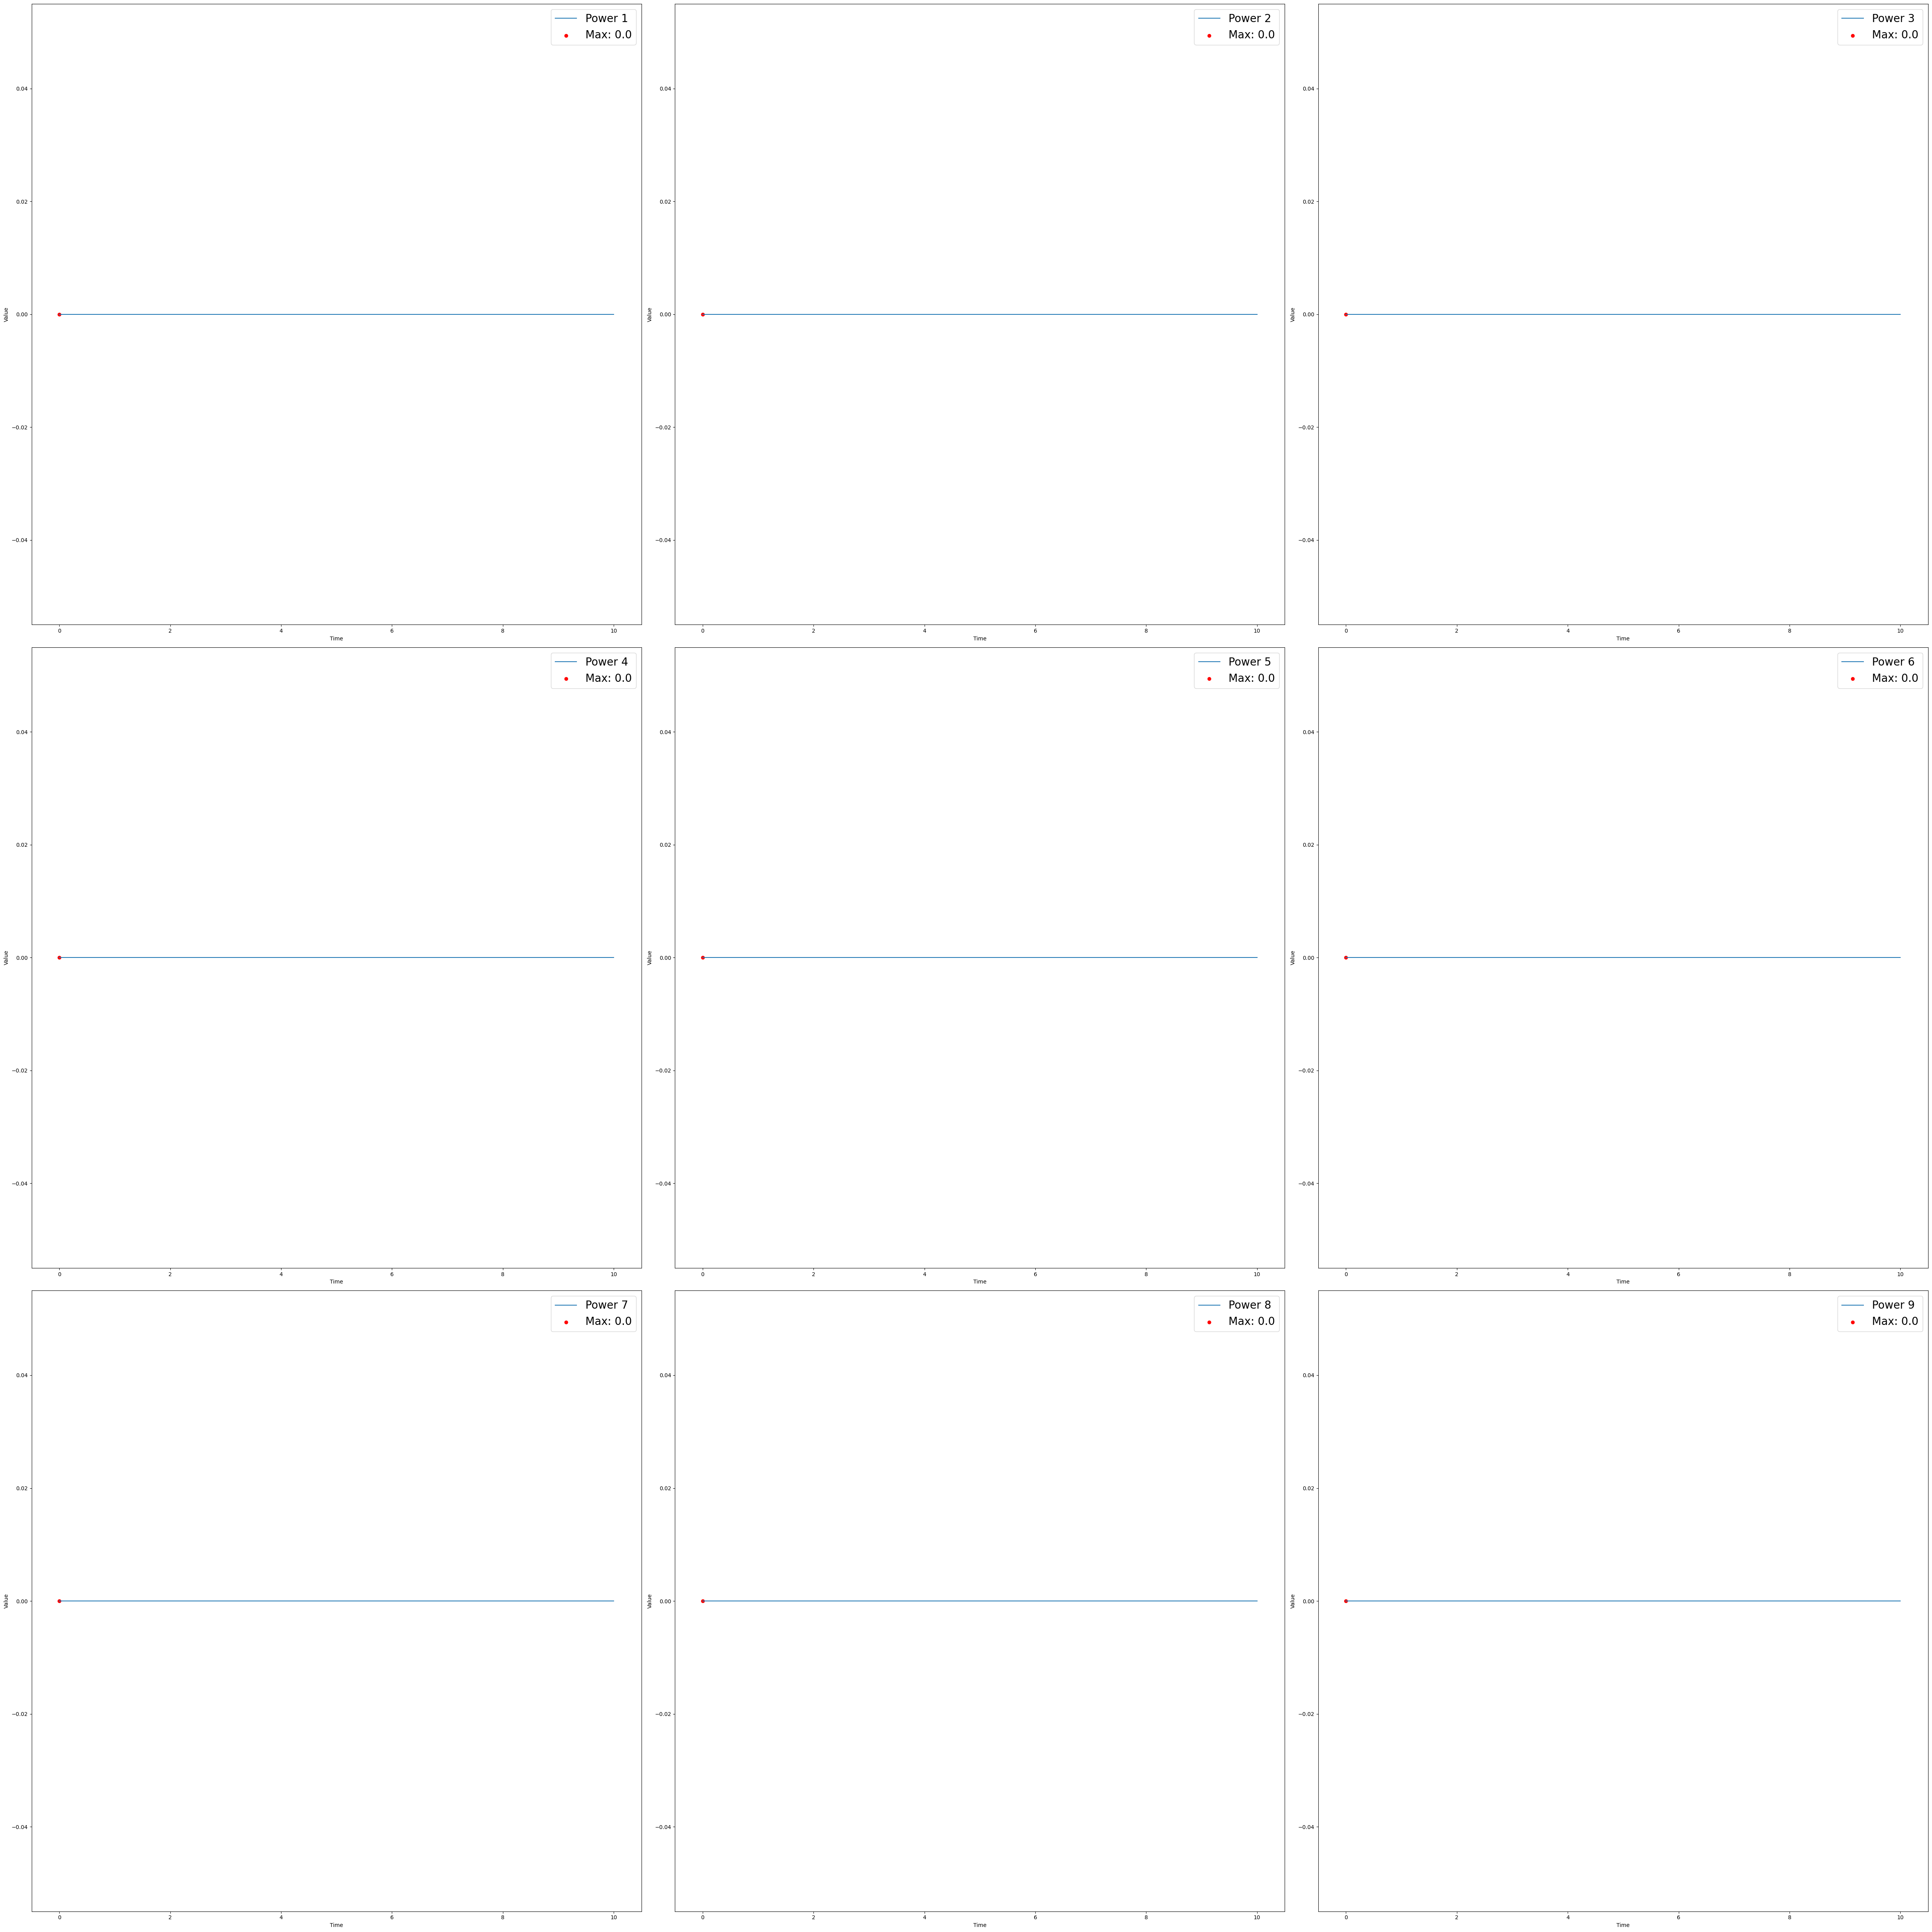

In [12]:
def test(num_qubits, t1, thetas, shots):
    """
        Return array time , W , P

        INPUT:
          t: time
          thetas: array parameter (length 2*(N-1))
          shots: number of measurement times

    """
    time = np.linspace(0, t1, shots)
    arrayW = []
    arrayP = []
    h1 = hamiltonian.h1_xx_1D(num_qubits, thetas)
    for t in time:
        w = object.E_1D(h1, t) - object.E_1D(h1, 0)
        if (t != 0):
            p = w/t
        else:
            p = 0
        arrayW.append(w)
        arrayP.append(p)

    return time, arrayW, arrayP


max_values = []
max_indices = []
t = 10
num_qubits = 2
fig, axs = plt.subplots(3, 3, figsize=(50, 50))

count = 0
for i in range(3):
    for j in range(3):
        count = count+1
        thetas = np.random.rand((num_qubits-1)) * 2 * np.pi
        ltime, arrayW, arrayP = test(num_qubits, t, thetas, 100)
        index = i * 10 + j
        max_value = np.max(arrayP)
        max_index = np.argmax(arrayP)
        axs[i, j].plot(ltime, arrayP, label=f"Power {count} ")
        axs[i, j].scatter(ltime[max_index], max_value,
                          color='red', label=f"Max: {np.round(max_value, 2)}")
        axs[i, j].set_xlabel('Time')
        axs[i, j].set_ylabel('Value')
        axs[i, j].legend(prop={'size': 20})

        max_values.append(max_value)
        max_indices.append(ltime[max_index])
max_P = np.max(max_values)
max_Pindex = np.argmax(max_values)
plt.tight_layout()

directory = 'imageresult'
if not os.path.exists(directory):
    os.makedirs(directory)
plt.savefig(os.path.join(directory, f'2QUBIT_100IMAGE(1).pdf'), format='pdf')
plt.show()